<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aumento-de-datos-y-transferencia-del-aprendizaje" data-toc-modified-id="Aumento-de-datos-y-transferencia-del-aprendizaje-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aumento de datos y transferencia del aprendizaje</a></span><ul class="toc-item"><li><span><a href="#Generación-de-imágenes" data-toc-modified-id="Generación-de-imágenes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generación de imágenes</a></span></li><li><span><a href="#Aumento-de-datos" data-toc-modified-id="Aumento-de-datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aumento de datos</a></span></li><li><span><a href="#Transferencia-del-aprendizaje" data-toc-modified-id="Transferencia-del-aprendizaje-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Transferencia del aprendizaje</a></span></li></ul></li></ul></div>

# Aumento de datos y transferencia del aprendizaje

## Generación de imágenes

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
import shutil

2023-08-29 20:51:54.165618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 20:51:54.637261: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 20:51:54.639641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 20:51:56.256614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
carpeta_base = "horse_human"
dir_ent = os.path.join(carpeta_base, 'entrenamiento')
os.mkdir(dir_ent)
dir_val = os.path.join(carpeta_base, 'validacion')
os.mkdir(dir_val)
dir_ent_cab = os.path.join(dir_ent, 'caballos')
os.mkdir(dir_ent_cab)
dir_ent_hum = os.path.join(dir_ent, 'humanos')
os.mkdir(dir_ent_hum)
dir_val_cab = os.path.join(dir_val, 'caballos')
os.mkdir(dir_val_cab)
dir_val_hum = os.path.join(dir_val, 'humanos')
os.mkdir(dir_val_hum)

FileExistsError: [Errno 17] File exists: 'horse_human/entrenamiento'

In [ ]:
num_ima_cab = 500
num_ima_hum = 527
porc_separacion = 0.2
# caballos
num_ima_pru_cab = np.round(porc_separacion * num_ima_cab)
num_ima_ent_cab = np.round(num_ima_cab - num_ima_pru_cab)
# humanos
num_ima_pru_hum = np.round(porc_separacion * num_ima_hum)
num_ima_ent_hum = np.round(num_ima_hum - num_ima_pru_hum)

In [ ]:
# img caballos
fnames = ['horse ({}).png'.format(i+1) for i in range(int(num_ima_ent_cab))]
for fname in fnames:
    src = os.path.join(carpeta_base+"/horses", fname)
    dst = os.path.join(dir_ent_cab, fname)
    shutil.copyfile(src, dst)

fnames = ['horse ({}).png'.format(i+1) for i in range(int(num_ima_ent_cab), num_ima_cab)]
for fname in fnames:
    src = os.path.join(carpeta_base+"/horses", fname)
    dst = os.path.join(dir_val_cab, fname)
    shutil.copyfile(src, dst)

# img humanos
fnames = ['human ({}).png'.format(i+1) for i in range(int(num_ima_ent_hum))]
for fname in fnames:
    src = os.path.join(carpeta_base+"/humans", fname)
    dst = os.path.join(dir_ent_hum, fname)
    shutil.copyfile(src, dst)

fnames = ['human ({}).png'.format(i+1) for i in range(int(num_ima_ent_hum), num_ima_hum)]
for fname in fnames:
    src = os.path.join(carpeta_base+"/humans", fname)
    dst = os.path.join(dir_val_hum, fname)
    shutil.copyfile(src, dst)

OSError: [Errno 28] No space left on device

In [ ]:
print('Total muestras de entrenamiento de caballos:', len(os.listdir(dir_ent_cab)))
print('Total muestras de entrenamiento de humanos:', len(os.listdir(dir_ent_hum)))
print('Total muestras de validación de caballos:', len(os.listdir(dir_val_cab)))
print('Total muestras de validación de humanos:', len(os.listdir(dir_val_hum)))

Total muestras de entrenamiento de caballos: 400
Total muestras de entrenamiento de humanos: 422
Total muestras de validación de caballos: 100
Total muestras de validación de humanos: 105


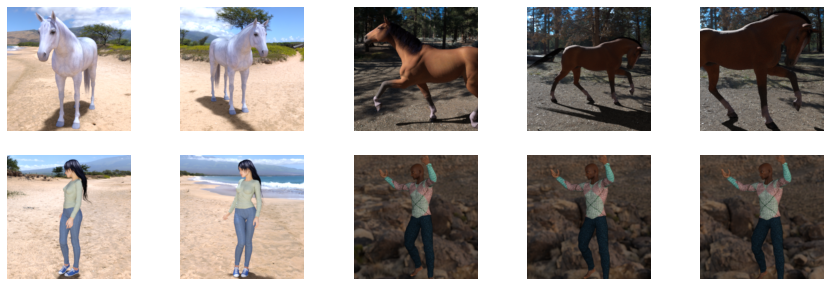

In [ ]:
# se muestran algunas imagenes    
nom_cab_ent = os.listdir(dir_ent_cab)
nom_hum_ent = os.listdir(dir_ent_hum)

plt.figure(figsize=(15,5))
img_caballos = [os.path.join(dir_ent_cab, fname) for fname in nom_cab_ent[:5]]
img_humanos = [os.path.join(dir_ent_hum, fname) for fname in nom_hum_ent[:5]]

for i, img_path in enumerate(img_caballos + img_humanos ):  
    sp = plt.subplot(2, 5, i + 1)
    sp.axis('Off') # no se muestran los ejes
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 33, 33, 128)      

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# preprocesamiento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen_datos_ent = ImageDataGenerator(rescale=1./255)

# entrenamiento
gen_ent = gen_datos_ent.flow_from_directory(
        dir_ent, 
        target_size=(300, 300),  
        batch_size=32,       
        class_mode='binary')
# prueba
gen_datos_pru = ImageDataGenerator(rescale=1./255)
gen_val = gen_datos_pru.flow_from_directory(
                  dir_val,
                  target_size=(300, 300),
                  batch_size=32,
                  class_mode='binary')

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [ ]:
history = model.fit(gen_ent, steps_per_epoch=10, epochs=10,validation_data=gen_val,
                             validation_steps=50, verbose=1)

Epoch 1/10
10/10 [==============================] - 48s 5s/step - loss: 0.7236 - acc: 0.5969 - val_loss: 0.6368 - val_acc: 0.7756
Epoch 2/10
10/10 [==============================] - 38s 4s/step - loss: 0.4641 - acc: 0.8194
Epoch 3/10
10/10 [==============================] - 40s 4s/step - loss: 0.2436 - acc: 0.9375
Epoch 4/10
10/10 [==============================] - 38s 4s/step - loss: 0.1126 - acc: 0.9742
Epoch 5/10
10/10 [==============================] - 41s 4s/step - loss: 0.0959 - acc: 0.9656
Epoch 6/10
10/10 [==============================] - 39s 4s/step - loss: 0.0690 - acc: 0.9806
Epoch 7/10
10/10 [==============================] - 39s 4s/step - loss: 0.1075 - acc: 0.9645
Epoch 8/10
10/10 [==============================] - 40s 4s/step - loss: 0.0707 - acc: 0.9750
Epoch 9/10
10/10 [==============================] - 41s 4s/step - loss: 0.0446 - acc: 0.9844
Epoch 10/10
10/10 [==============================] - 39s 4s/step - loss: 0.0386 - acc: 0.9875


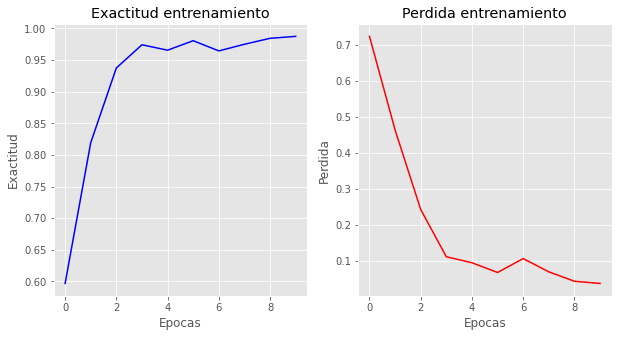

In [ ]:
def dibujarGraficas():
    plt.figure(figsize=(10,5))    
    n = np.arange(0, 10)
    plt.subplot(121)
    plt.title('Exactitud entrenamiento')
    plt.plot(n, history.history['acc'],'b')    
    plt.xlabel("Epocas")
    plt.ylabel("Exactitud")   
    
    plt.subplot(122)
    plt.title('Perdida entrenamiento')
    plt.plot(n, history.history['loss'],'r')
    plt.xlabel("Epocas")
    plt.ylabel("Perdida")    
    plt.show()
dibujarGraficas()

In [ ]:
print("Exactitud datos validación: {:.2f}".format(history.history['val_acc'][-1]))

Exactitud datos validación: 0.78


## Aumento de datos

In [ ]:
# preprocesamiento de datos
gen_datos_ent = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

# entrenamiento
gen_ent = gen_datos_ent.flow_from_directory(
        dir_ent, 
        target_size=(300, 300),  
        batch_size=32,       
        class_mode='binary')

Found 822 images belonging to 2 classes.


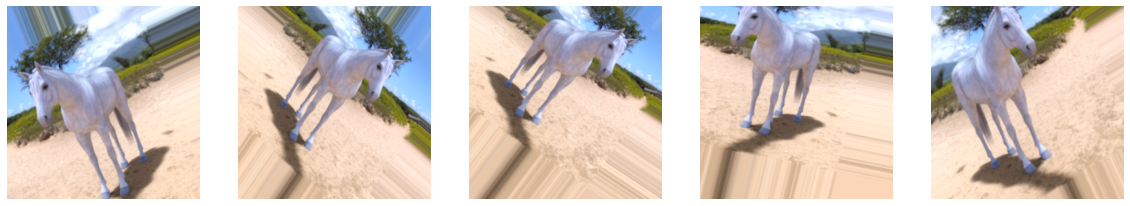

In [ ]:
img_path = img_caballos[1]
img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
gen = gen_datos_ent.flow(x, batch_size=1)

plt.figure(figsize=(20,10))
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [ ]:
history = model.fit(gen_ent, steps_per_epoch=10, epochs=10,validation_data=gen_val,
                             validation_steps=50, verbose=1)

Epoch 1/10
10/10 [==============================] - 51s 5s/step - loss: 0.3082 - acc: 0.8710 - val_loss: 0.1600 - val_acc: 0.9317
Epoch 2/10
10/10 [==============================] - 41s 4s/step - loss: 0.3138 - acc: 0.8656
Epoch 3/10
10/10 [==============================] - 41s 4s/step - loss: 0.2738 - acc: 0.8968
Epoch 4/10
10/10 [==============================] - 44s 4s/step - loss: 0.2262 - acc: 0.9156
Epoch 5/10
10/10 [==============================] - 43s 4s/step - loss: 0.2447 - acc: 0.8968
Epoch 6/10
10/10 [==============================] - 42s 4s/step - loss: 0.2250 - acc: 0.9065
Epoch 7/10
10/10 [==============================] - 43s 4s/step - loss: 0.2436 - acc: 0.9000
Epoch 8/10
10/10 [==============================] - 40s 4s/step - loss: 0.2164 - acc: 0.8871
Epoch 9/10
10/10 [==============================] - 40s 4s/step - loss: 0.2380 - acc: 0.9032
Epoch 10/10
10/10 [==============================] - 39s 4s/step - loss: 0.2325 - acc: 0.8839


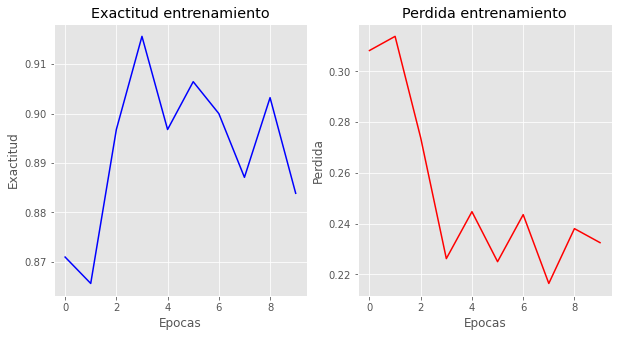

In [ ]:
dibujarGraficas()

In [ ]:
print("Exactitud datos validación: {:.2f}".format(history.history['val_acc'][-1]))

Exactitud datos validación: 0.93


In [ ]:
path_img = carpeta_base+'/prueba_persona.png'
img = image.load_img(path_img, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
prediccion = model.predict(images)
if prediccion[0]>0.5:
  print("Es humano")
else:
  print("Es un caballo")

Es humano


## Transferencia del aprendizaje

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for i, layer in enumerate(model.layers):
    print (i, layer.name, layer.output_shape)

model = models.Model(inputs=model.input, 
      outputs=model.get_layer('block4_pool').output)

0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


(-0.5, 299.5, 183.5, -0.5)

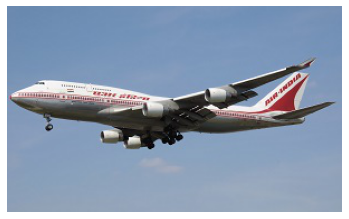

In [ ]:
imp_p = 'prueba_avion.jpg'
path = 'horse_human/'+imp_p
img = mpimg.imread(path)
implot = plt.imshow(img)
plt.grid(False)
plt.axis('off')

In [ ]:
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
salida = np.argmax(preds)
print("Índice de la imagen:" + str(salida))

clase = decode_predictions(preds)
clase = clase[0][0]
print('%s: %.2f%%' % (clase[1], clase[2]*100))

Índice de la imagen:404
airliner: 76.73%
